# Expanding Threat Landscape

The proliferation and accessibility of cyber offense toolkits and weapons has resulted in a significantly enhanced threat environment for modern network systems and administrators. Networks are increasingly vulnerable to both internal ('inside man') and external attack vectors. Modern Intrusion Detection Systems (IDSs) analyze network traffic for known fingerprints from hacking groups, but these systems are in constant need of updates to identify malign actions over a network. The amount of network data coupled with the ever-expanding threat environment offer an opportunity to apply advanced machine learning techniques to identify emerging threats in real time allowing for rapid detection and isolation of malicious network traffic.

# Purpose
The purpose of this project is to explore the application of machine learning models for analyzing network traffic to identify potential threats. In this project I will train and compare several different machine learning models using the open-source network traffic data set provided by the Canadian Institute for Cybersecurity University of New Brunswick (https://www.unb.ca/cic/datasets/ids-2018.html). These data represent realistic network traffic for a medium-sized network with several client and server nodes running Windows and Linux (Ubuntu) operating systems. The cleaned datasets consist mostly of benign network traffic with a small amount of simulated cyber-attack data with 7 different attack profiles. Thus, we have a realistic, imbalanced dataset in which most of the network traffic is considered benign and acceptable with a small percentage of traffic that must be identified, isolated, and eliminated.

# Process
The detection of malicious network traffic is an anomaly detection problem since most of the traffic will be benign. For this reason, I will start by analyzing and visualizing aggregate data to gain insight for feature detection and feature engineering. 

I will use supervised learning models in the initial phases of project but will consider the implications of unsupervised learning techniques such as clustering and reinforcement learning. Once I have identified and optimized the most promising models, I will analyze the processing time and memory profiles. Since network traffic must be identified rapidly in real time, I work to translate the model to a low-level language such as C++ to capitalize on 'bare-metal' computation in order to reduce latency.

# Benefit/Value
The final product of this research project will help inform cyber defense practices in the ever-changing 'cat and mouse game' of cyber warfare. The hope of this project is that it will help protect secure, private, data from external and internal attacks saving companies millions of dollars in financial penalties and saving everyday people from becoming victims of cyber attackers, criminals, and nation-state hackers.


# Download and import data
Data for this project can be downloaded from AWS following the instructions listed in the University of New Brunswick website: https://www.unb.ca/cic/datasets/ids-2018.html

Once downloaded, extract the data files, and change the file path string to in the following code block to point to the location of the extracted csv files. The following code block only needs to be executed a single time and will save a consolidated dataset into the working directory of this Jupiter notebook.


In [1]:
from os import listdir
import pandas as pd
from sklearn.model_selection import train_test_split

data_directory = "D:\IDS\Processed Traffic Data for ML Algorithms\\"

data_filenames = listdir(data_directory)

all_data = pd.read_csv(data_directory + data_filenames.pop(), low_memory=False)

while len(data_filenames) > 0:
    next_day_data = pd.read_csv(data_directory + data_filenames.pop(),low_memory=False)
    all_data = pd.concat([all_data, next_day_data])

all_data = all_data[all_data['Label'] != 'Label']

y = all_data.pop('Label')

X_train, X_test, y_train, y_test = train_test_split(all_data, y, test_size=0.33, random_state=42)

X_train.to_csv('X_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\IDS\\Processed Traffic Data for ML Algorithms\\'

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# import the data:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

In [34]:
X_train.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [2]:
X_train = X_train.drop(columns=['Flow ID','Src IP', 'Src Port','Dst IP','Dst Port', 'Protocol', 'Timestamp', 'Flow Duration'])

In [36]:
len(X_train.columns)


75

In [37]:
X_train.head()

,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1,1,44.0,72.0,44.0,44.0,44.000000,0.000000,72.0,72.0,...,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,92.0,262.0,46.0,46.0,46.000000,0.000000,131.0,131.0,...,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,13,535.0,5055.0,194.0,0.0,59.444444,82.524407,1460.0,0.0,...,4,20,124594.0,0.0,124594.0,124594.0,26938144.0,0.0,26938144.0,26938144.0
3,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X_train.describe(include='all')

,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,...,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07,1.087607e+07
mean,2.312924e+01,6.318257e+00,9.516847e+02,4.742377e+03,2.007400e+02,1.107790e+01,5.030993e+01,7.083906e+01,3.501727e+02,2.647541e+01,...,1.949415e+01,1.799239e+01,1.723768e+05,8.640405e+04,2.618028e+05,1.149862e+05,5.065175e+06,3.144394e+05,5.526079e+06,4.690673e+06
std,1.501593e+03,1.650415e+02,5.060427e+04,2.372654e+05,3.031672e+02,2.427795e+01,6.044778e+01,1.163880e+02,4.974237e+02,5.097636e+01,...,1.500346e+03,7.691598e+00,2.500471e+06,1.515451e+06,3.315256e+06,2.107754e+06,2.948463e+08,1.862165e+08,6.834535e+08,7.532622e+07
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,4.300000e+01,1.010000e+02,4.000000e+01,0.000000e+00,3.600000e+01,0.000000e+00,9.500000e+01,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,4.000000e+00,4.560000e+02,5.820000e+02,3.080000e+02,2.900000e+01,6.740000e+01,1.046421e+02,4.880000e+02,4.800000e+01,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.096290e+05,1.231180e+05,4.176568e+07,1.563604e+08,6.444000e+04,1.460000e+03,1.497312e+04,1.576084e+04,6.516000e+04,1.460000e+03,...,3.096280e+05,5.600000e+01,1.140000e+08,7.523241e+07,1.140000e+08,1.140000e+08,3.955714e+11,2.622479e+11,9.797810e+11,2.399340e+11


Based on these findings there are several fields with missing data including: 

The fact that data are missing may be informative in and of itself. For each of these fields, we need to understand the best method for imputing missing data, but first I will build a baseline model using a Random Forest Classifier.


In [5]:
# split data for cleaner viz:
X_train.head()
#X_viz, test, y_viz, y_test = train_test_split(X_train, y_train, test_size=0.80, random_state=42)
X_train['Label'] = y_train
X_train['Label'] = X_train['Label'].astype('category').cat.codes

In [6]:
X_train['Label_Bin'] = ['1' if flow == 0 else '0' for flow in X_train['Label']]
y_train = X_train.pop('Label')
y_train = X_train.pop('Label_Bin')

In [7]:
X_viz['Label']

NameError: name 'X_viz' is not defined

In [42]:
X_viz['Label_Bin']

8266308     1
2073381     0
10831061    0
2573702     1
1349466     1
           ..
2234489     1
4304572     1
10081351    1
6550634     1
6423388     1
Name: Label_Bin, Length: 2175214, dtype: object

In [43]:
pd.unique(X_viz['Label_Bin'])
#y_train.head()

array(['1', '0'], dtype=object)

# Data exploration:

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 30]

def plot_multiple_limits(x_label, dataset, plot_type, limit_list, hue_label='', y_data=''):
    fig, axes = plt.subplots(nrows=len(limit_list), ncols=1)
    for i in range(len(limit_list)):
        if hue_label == '' and y_data == '':
            bar_plot = plot_type(ax=axes[i],x=x_label, data=dataset)
        elif y_data != '':
            bar_plot = plot_type(ax=axes[i],x=x_label, y=y_data, hue=hue_label, data=dataset)
            bar_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        else:
            bar_plot = plot_type(ax=axes[i],x=x_label, hue=hue_label, data=dataset)
            bar_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        bar_plot.set(ylabel='Record Count', xlabel='',ylim=(0, limit_list[i]))
        if i < len(limit_list)-1:
            bar_plot.set(xticklabels=[])
    for item in bar_plot.get_xticklabels():
            item.set_rotation(90)
    bar_plot.set(xlabel=x_label)

<AxesSubplot:xlabel='count', ylabel='Label_Bin'>

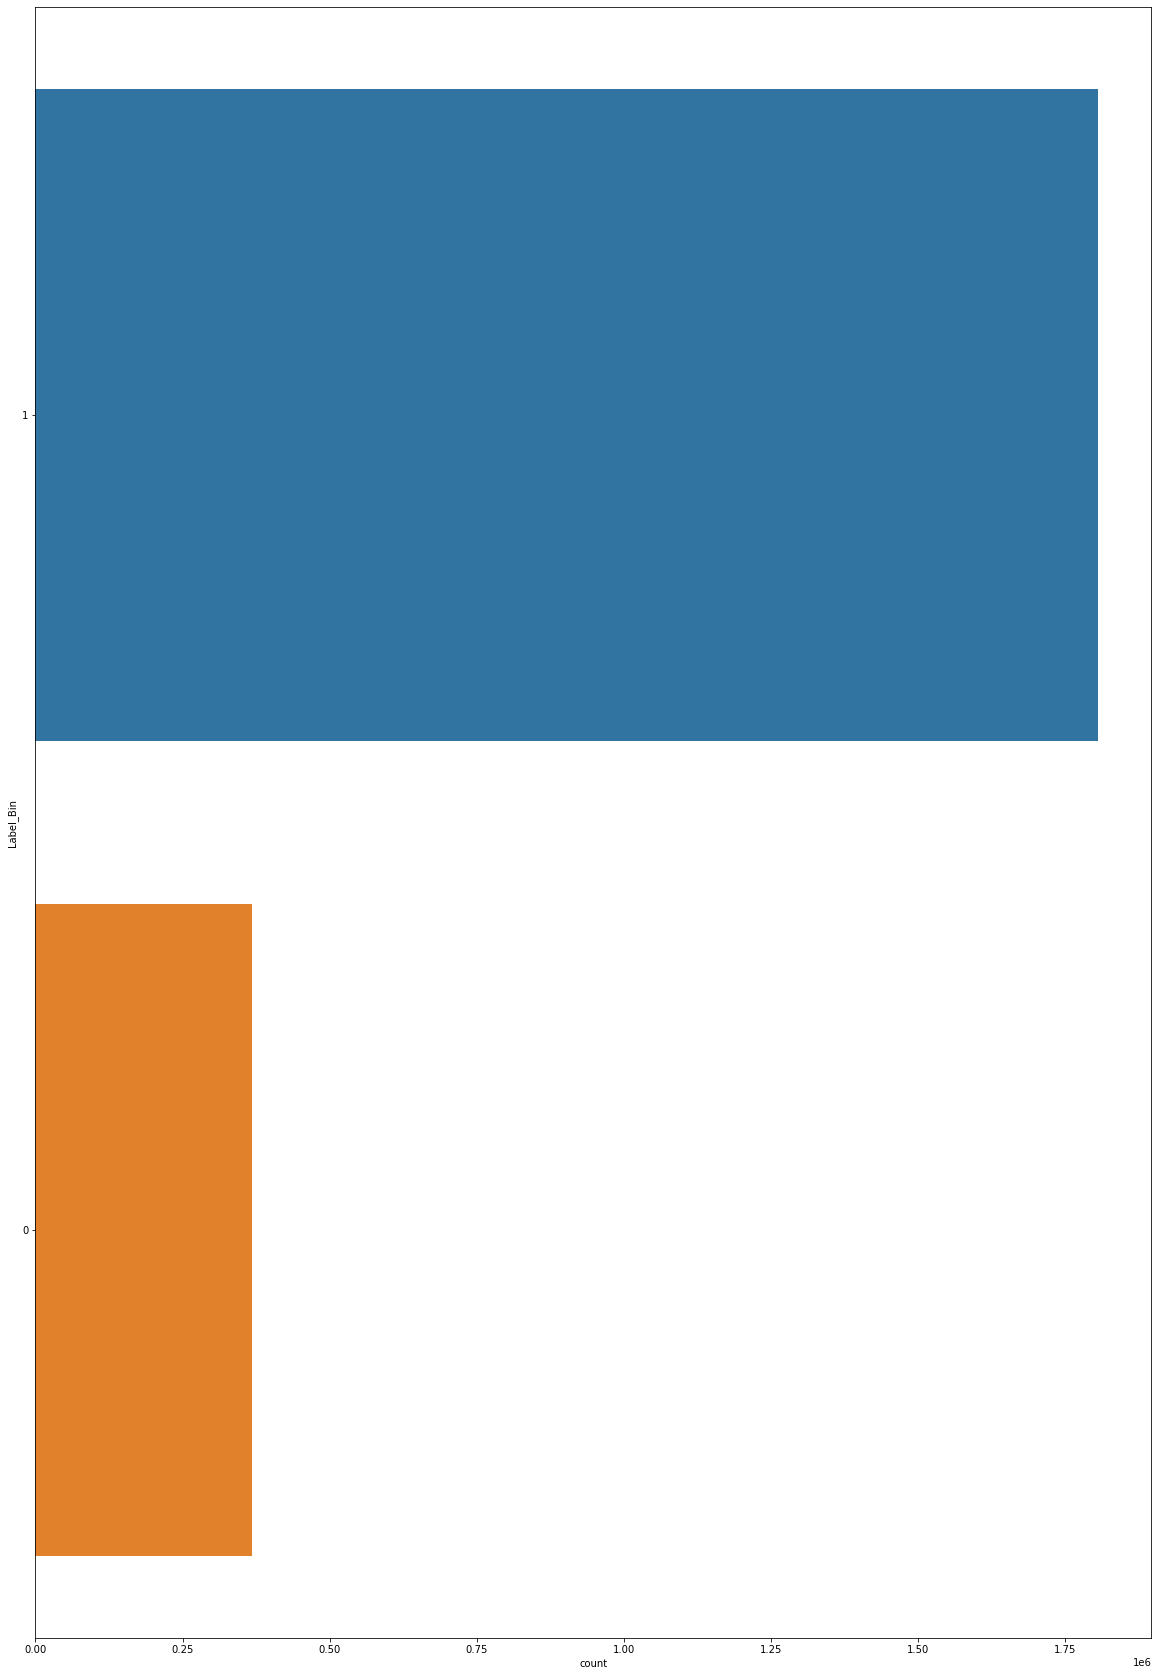

In [14]:
sns.countplot(y="Label_Bin", data=X_viz)

In [53]:
all_features = X_viz.columns

numerical_features = X_viz._get_numeric_data().columns

categorical_features = list(set(all_features) - set(numerical_features))
print("Categorical features: {} \n".format(*categorical_features))
print("Numerical features: {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {},{}, {}, {}, {}, {},{}, {}, {}, {}, {},{}, {}, {}, {}, {},{}, {}, {}, {}, {},{}, {}, {}, {}, {}, {}, {}, {}, {}, {},{}, {}, {}, {}, {},{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}".format(*set(numerical_features)))

Categorical features: Label_Bin 



IndexError: Replacement index 76 out of range for positional args tuple

# Categorical data:

## Distribution of attack profiles

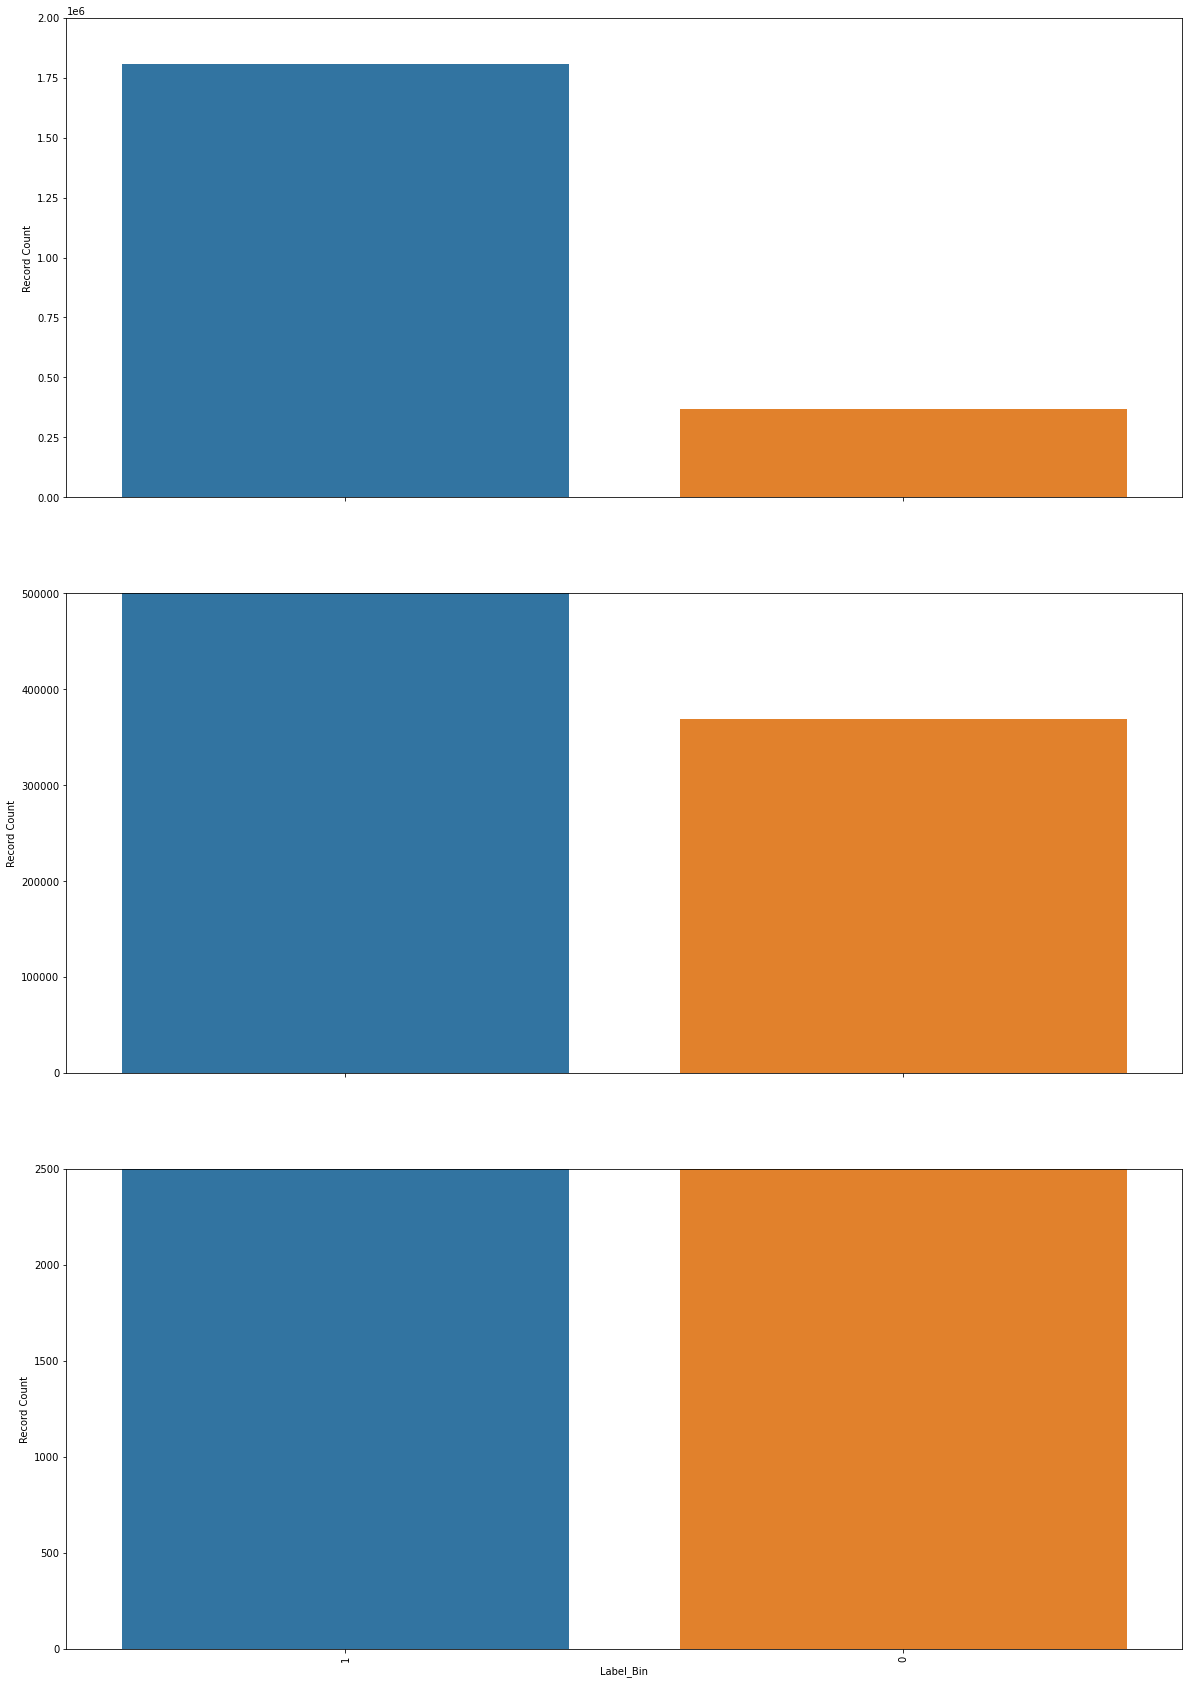

In [18]:
plot_multiple_limits('Label_Bin', X_viz, sns.countplot, [2000000, 500000, 2500])

In [13]:
from collections import Counter
y = y_train.squeeze()
counter = Counter(y.tolist())
print(counter)
len(counter)

Counter({'Benign': 9034864, 'DDOS attack-HOIC': 460231, 'DDoS attacks-LOIC-HTTP': 385863, 'DoS attacks-Hulk': 309544, 'Bot': 191587, 'FTP-BruteForce': 129214, 'SSH-Bruteforce': 125751, 'Infilteration': 108404, 'DoS attacks-SlowHTTPTest': 93726, 'DoS attacks-GoldenEye': 27822, 'DoS attacks-Slowloris': 7306, 'DDOS attack-LOIC-UDP': 1127, 'Brute Force -Web': 420, 'Brute Force -XSS': 157, 'SQL Injection': 55})


15

It appears that DDOS attacks account for the largest amount of data after benign network traffic and this makes sense as these types of attack involve flooding a network with a many HTTP requests. Knowledge of this distribution will help when trying to differentiate and categorize different attack profiles.

## Port number and attack profiles:

### Destination Port:

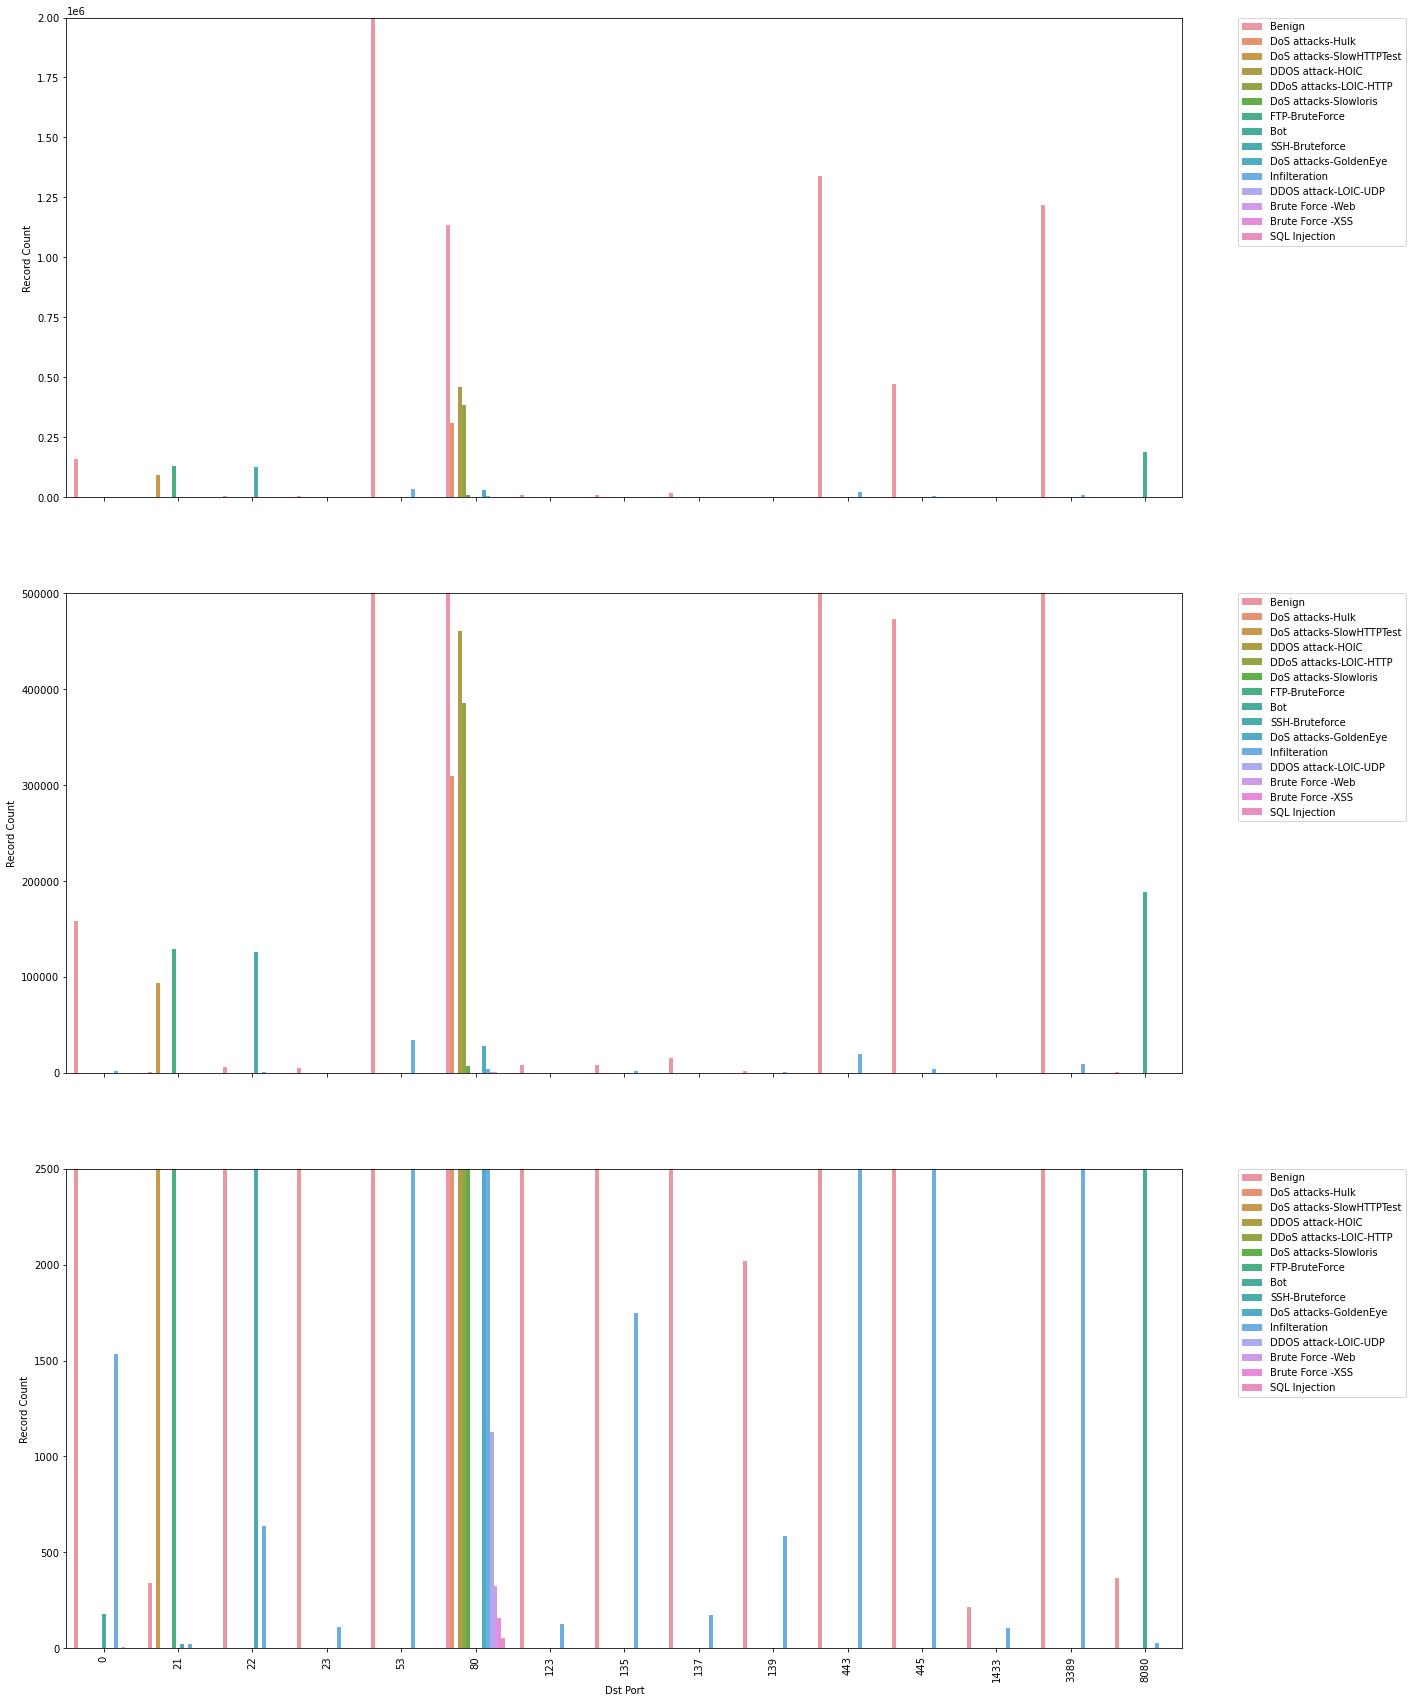

In [9]:
high_activity_ports = X_train.groupby('Dst Port').count()
high_activity_port_list = high_activity_ports[high_activity_ports['Label'] > 100].index

plot_multiple_limits('Dst Port', X_train[X_train['Dst Port'].isin(high_activity_port_list)], sns.countplot, [2000000, 500000, 2500],'Label')


This plot presents the attack profile activity associated with the most active destination ports. Unsurprisingly, these same ports are also the most active for benign activity such as ports 80, 43, and 8080 for HTTP and HTTPS requests. Although this information is helpful in categorizing different attack profiles it is unlikely to help in differentiating malicious activity from benign traffic.

The 'Dst Port' is a categorical field which tells us the port number that was targeted in the case of an attack or in the case of benign traffic it provides information about the type of network behavior indicative of normal, warranted use. Differences in the distribution of attack profiles and benign traffic on port numbers can provide insight into how attackers gain access, in the case of infiltration and brute force attacks, as well as what data or services attackers may be targeting in the case of SQL Injection or DOS/DDOS attacks. 

Based on these findings, it will be important to track these port numbers using target encoding in the preprocessing section.


### Source Port:

Source port variable does not provide additional insight and will be included in the final dataset.

# Protocol and attack profiles:

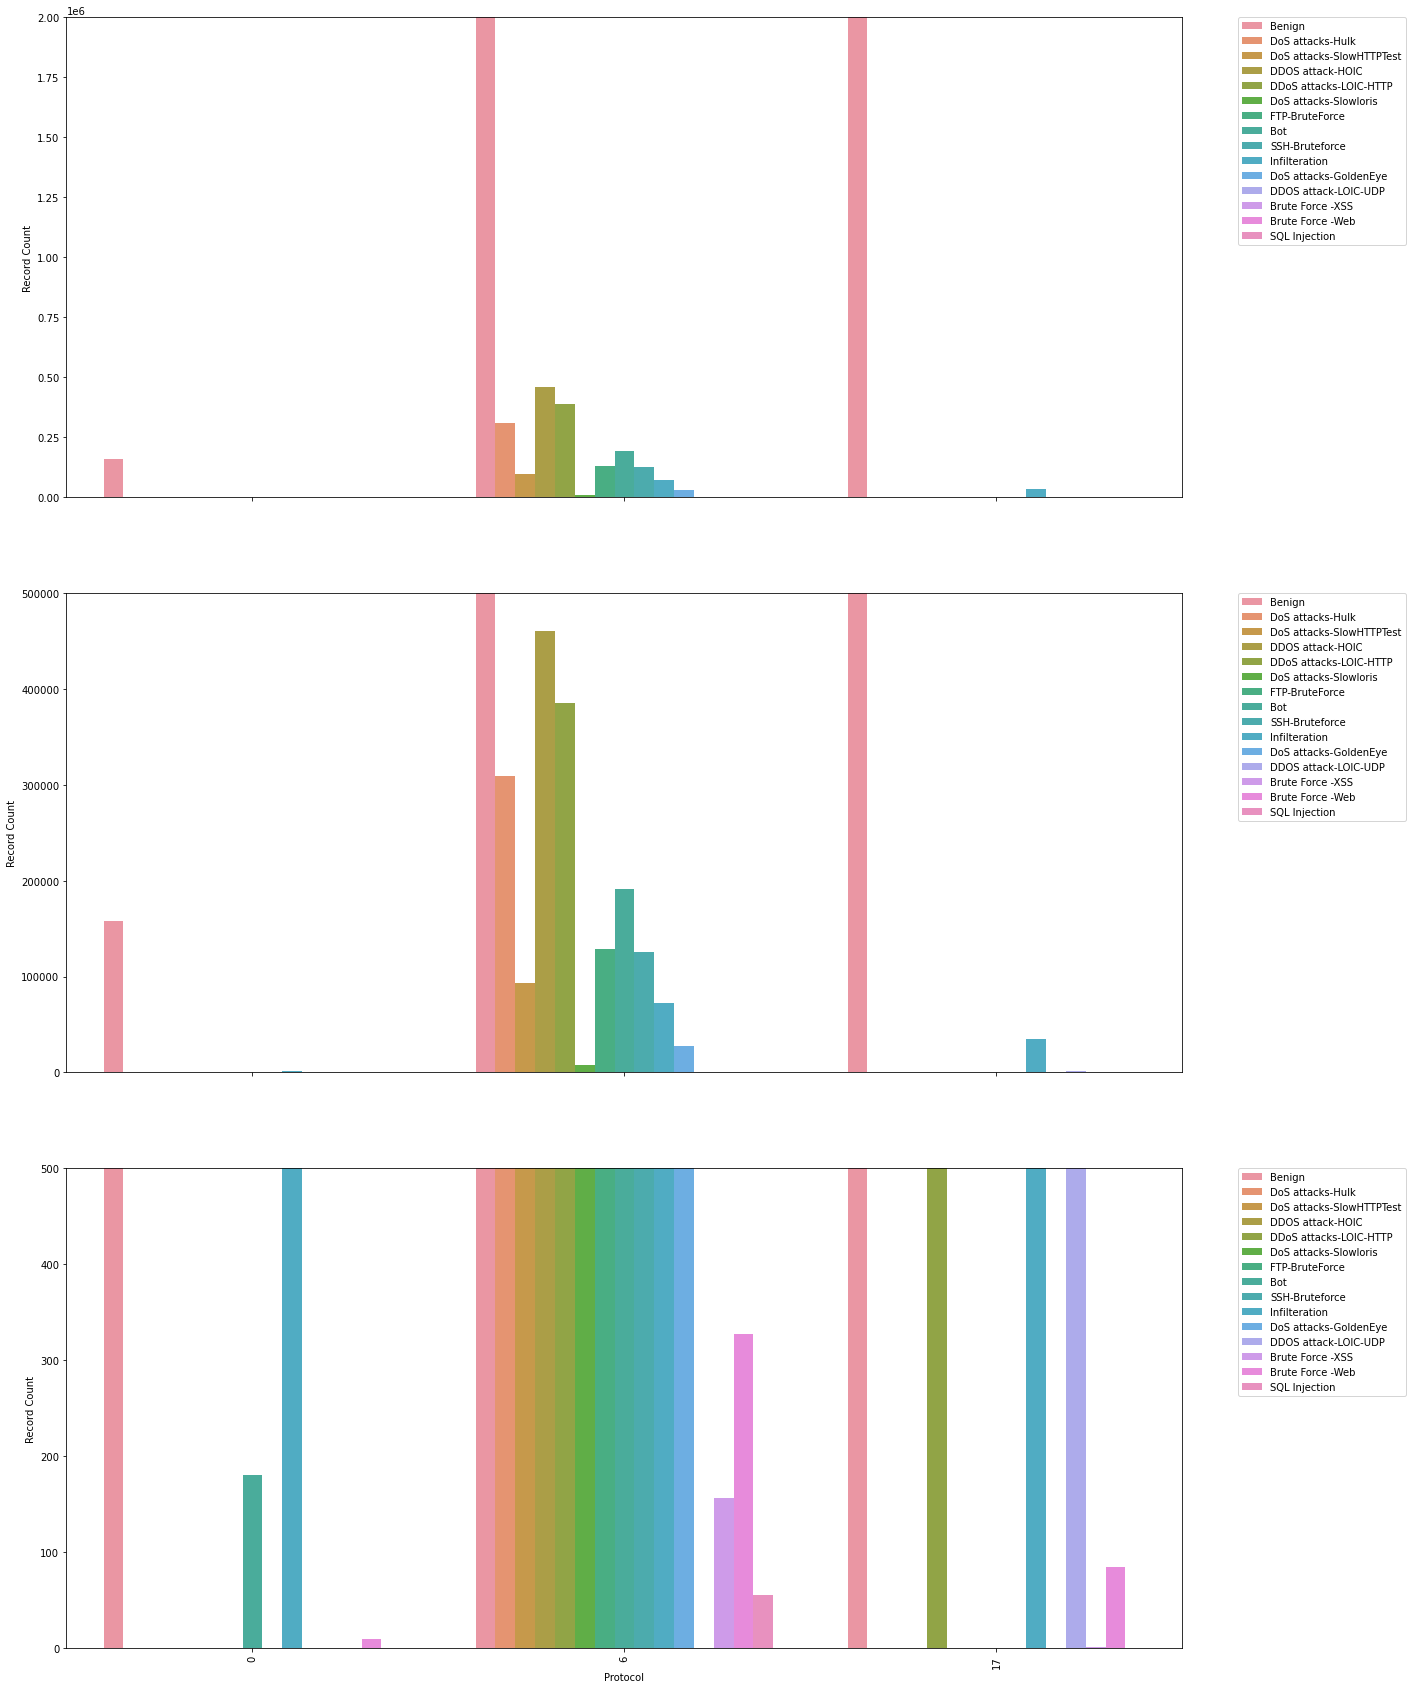

In [10]:
plot_multiple_limits('Protocol', X_train, sns.countplot, [2000000, 500000, 500], 'Label')

As with 'Dst Port', the 'Protocol' field is categorical and each protocol defines the rules communication between nodes in a network.  

In [ ]:
X_viz[numericalFeatures,'Label_Bin']

# Numerical Features

['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Label_Bin']


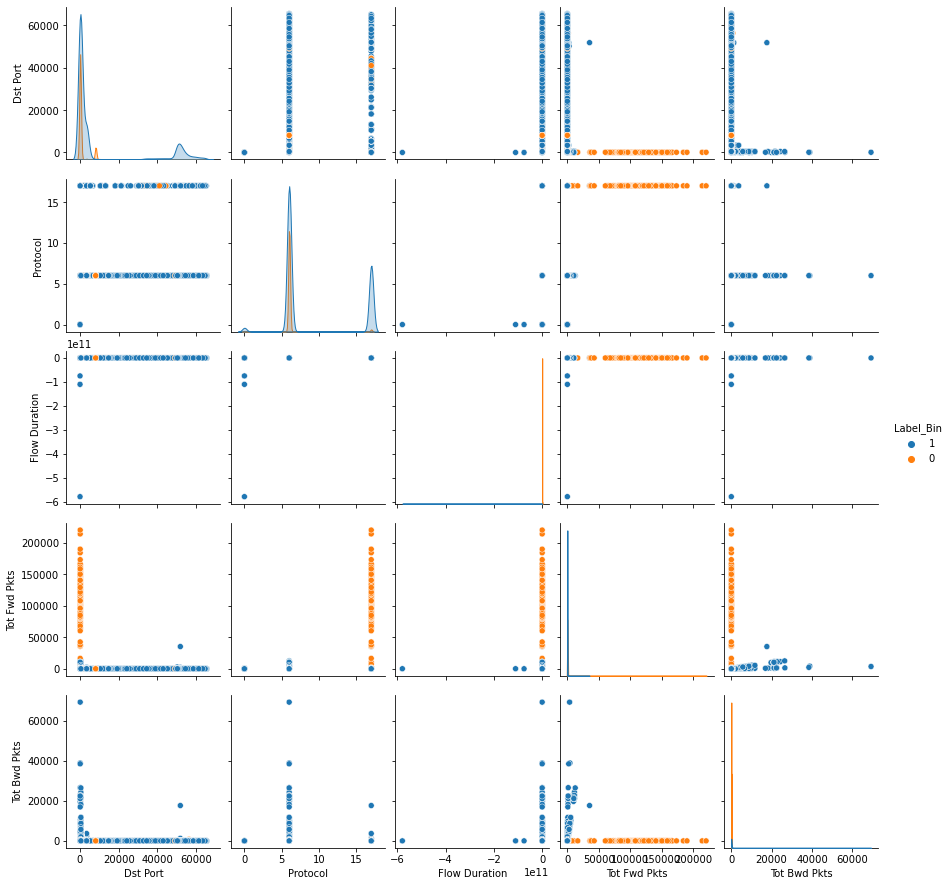

In [30]:
scatter_features = list(numerical_features[:5])
scatter_features.append("Label_Bin")
print(scatter_features)
pair_plot_num_data = sns.pairplot(X_viz[scatter_features], hue="Label_Bin")

# Data Preparation:

## Remove uneccessary columns:
My goal with this project is to build and training a classifier model that will work for a variety of networks and identify novel threats. For this reason, it is important to remove any source of information that relate to this specific data set such as 'Timestamp', 'Src IP', and 'Dst IP'
fields as these data are specific to the network and attack machines used to create this data set.

In [12]:
# This section replaces infinity values with nan and then removes rows with nan
# this practice reduces the problem to binary classification and was changed 
# to inputation after the first baseline model.

#X_train.replace(np.inf, np.nan, inplace=True)
#X_train.replace(-np.inf, np.nan, inplace=True)

# # Remove all rows with missing data:
#X_train = X_train.dropna()

#combine the features and labels for the following visualizations and data exploration steps
# This will be separated before we train the models
#X_train['Label'] = y_train
#X_train['Label'] = X_train['Label'].astype('category').cat.codes

## Replace infinite values:

Removing records with infinite values altered the problem into binary classification by eliminating all but a single DDoS attack profile. The following section identifies and replaces infinite values.

In [8]:
all_features = X_train.columns

numerical_features = X_train._get_numeric_data().columns

categorical_features = list(set(all_features) - set(numerical_features))

In [9]:
import numpy as np
inifinity_cols = X_train[set(numerical_features)].columns.to_series()[np.isinf(X_train[set(numerical_features)]).any()]

# Replace the infinity with the maximum non-infinite value of a column multiplied by 2
# negative infinity will be replaced with a minimum value of a column multiplied by 2 
#(for negative numbers) or by the minimum non-negative value multiplied by negative 2:
for col_name in inifinity_cols:
    col_vals = X_train[col_name].replace(np.inf, 0)
    col_inf_replacement = col_vals.max() * 5
    col_vals = X_train[col_name].replace(-np.inf, 100000)
    if col_vals.min() > 0:
        col_negInf_replacement = col_vals.min() * -5
    elif  col_vals.min() == 0:
        col_negInf_replacement = -100000
    else:
        col_negInf_replacement = col_vals.min() * 5
    X_train.replace(np.inf, col_inf_replacement, inplace=True)
    X_train.replace(-np.inf, col_negInf_replacement, inplace=True)
    
    

In [14]:
#Check to make sure the number of target labels is maintained:
len(X_train['Label'].unique())

15

In [58]:
#import category_encoders as ce
# Target encoding for categorical variables 

#X_train['Dst Port'] = X_train['Dst Port'].astype('category')
#X_train['Protocol'] = X_train['Protocol'].astype('category')

#tenc_port = ce.TargetEncoder()
#dst_port_targetEnc = tenc_port.fit_transform(X_train['Dst Port'],X_train['Flow Duration'])

#X_train = dst_port_targetEnc.join(X_train.drop('Dst Port', axis=1))

#tenc_protocol = ce.TargetEncoder()
#protocol_targetEnc = tenc_protocol.fit_transform(X_train['Protocol'],X_train['Flow Duration'])

#X_train = protocol_targetEnc.join(X_train.drop('Protocol', axis=1))



In [10]:
from sklearn.impute import SimpleImputer

#y_train = X_train.pop('Label')
##y_train[y_train != 'Benign'] = "Malicious"

# # Remove features that are specific to this dataset:

# # Inputer for numerical variables:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer_mean.fit_transform(X_train)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

In [63]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.014737,-0.032224,-0.017937,-0.019684,-0.517009,1.356050,-0.104387,-0.608646,-0.559227,0.893053,...,-0.012993,-1.299131,-0.068938,-0.057015,-0.078969,-0.054554,-0.017179,-0.001689,-0.008086,-0.062271
1,-0.014071,-0.026165,-0.016988,-0.018883,-0.510412,1.438429,-0.071300,-0.608646,-0.440616,2.050452,...,-0.012327,-1.299131,-0.068938,-0.057015,-0.078969,-0.054554,-0.017179,-0.001689,-0.008086,-0.062271
2,-0.009409,0.040485,-0.008234,0.001318,-0.022232,-0.456295,0.151114,0.100400,2.231151,-0.519367,...,-0.010327,0.261013,-0.019110,-0.057015,-0.041387,0.004558,0.074184,-0.001689,0.031329,0.295348
3,-0.014737,-0.032224,-0.018806,-0.019988,-0.662143,-0.456295,-0.832288,-0.608646,-0.703973,-0.519367,...,-0.012993,0.261013,-0.068938,-0.057015,-0.078969,-0.054554,-0.017179,-0.001689,-0.008086,-0.062271
4,-0.013405,-0.038283,-0.018806,-0.019988,-0.662143,-0.456295,-0.832288,-0.608646,-0.703973,-0.519367,...,-0.012993,1.821157,-0.068938,-0.057015,-0.078969,-0.054554,-0.017179,-0.001689,-0.008086,-0.062271


In [64]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.014737,-0.032224,-0.017937,-0.019684,-0.517009,1.356050,-0.104387,-0.608646,-0.559227,0.893053,...,-0.012993,-1.299131,-0.068938,-0.057015,-0.078969,-0.054554,-0.017179,-0.001689,-0.008086,-0.062271
1,-0.014071,-0.026165,-0.016988,-0.018883,-0.510412,1.438429,-0.071300,-0.608646,-0.440616,2.050452,...,-0.012327,-1.299131,-0.068938,-0.057015,-0.078969,-0.054554,-0.017179,-0.001689,-0.008086,-0.062271
2,-0.009409,0.040485,-0.008234,0.001318,-0.022232,-0.456295,0.151114,0.100400,2.231151,-0.519367,...,-0.010327,0.261013,-0.019110,-0.057015,-0.041387,0.004558,0.074184,-0.001689,0.031329,0.295348
3,-0.014737,-0.032224,-0.018806,-0.019988,-0.662143,-0.456295,-0.832288,-0.608646,-0.703973,-0.519367,...,-0.012993,0.261013,-0.068938,-0.057015,-0.078969,-0.054554,-0.017179,-0.001689,-0.008086,-0.062271
4,-0.013405,-0.038283,-0.018806,-0.019988,-0.662143,-0.456295,-0.832288,-0.608646,-0.703973,-0.519367,...,-0.012993,1.821157,-0.068938,-0.057015,-0.078969,-0.054554,-0.017179,-0.001689,-0.008086,-0.062271


# Attack Profile Classification:
## XGBoost Classifier:

For this classification task I decided to conduct multiclass classification with XGBoost using histogram-based boosting to categorize network traffic. I chose this method because of its speed and ability to handle large datasets. First I will create a default, baseline classifier to compare subsequent models:

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model = XGBClassifier(tree_method='hist')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

In [3]:
import tempfile
import pickle
import os
import optuna

try:
    study
except NameError:
    study = optuna.create_study(direction="maximize")

try:
    tempdir
except NameError:
    tempdir = tempfile.TemporaryDirectory().name
    os.mkdir(tempdir)

print(tempdir)

with open(f"{os.path.join(tempdir, str(study.best_trial.number))}.pkl", "rb") as f:
    best_model = pickle.load(f)

# Evaluation

In [23]:
#TODO: I need to turn this into a pipeline to reducce the code. I am just putting this in for now
# to get baseline model predictions for the binary classifier.


X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

#X_test.replace([np.inf, -np.inf],np.nan, inplace=True)

#X_test['Label'] = y_test

# Remove all rows with missing data:
#X_test = X_test.dropna()

#y_test = X_test.pop('Label')

#y_test[y_test != 'Benign'] = "Malicious"

# Replace the infinity with the maximum non-infinite value of a column multiplied by 2
# negative infinity will be replaced with a minimum value of a column multiplied by 2 
#(for negative numbers) or by the minimum non-negative value multiplied by negative 2:
for col_name in inifinity_cols:
    col_vals = X_test[col_name].replace(np.inf, 0)
    col_inf_replacement = col_vals.max() * 2
    col_vals = X_test[col_name].replace(-np.inf, 100000)
    if col_vals.min() > 0:
        col_negInf_replacement = col_vals.min() * -2
    elif  col_vals.min() == 0:
        col_negInf_replacement = -100000
    else:
        col_negInf_replacement = col_vals.min() * 2
    X_test.replace(np.inf, col_inf_replacement, inplace=True)
    X_test.replace(-np.inf, col_negInf_replacement, inplace=True)

# Target encoding for categorical variables 

X_test['Dst Port'] = X_test['Dst Port'].astype('category')
X_test['Protocol'] = X_test['Protocol'].astype('category')

tenc_port = ce.TargetEncoder()
dst_port_targetEnc = tenc_port.fit_transform(X_test['Dst Port'],X_test['Flow Duration'])

X_test = dst_port_targetEnc.join(X_test.drop('Dst Port', axis=1))

tenc_protocol = ce.TargetEncoder()
protocol_targetEnc = tenc_protocol.fit_transform(X_test['Protocol'],X_test['Flow Duration'])

X_test = protocol_targetEnc.join(X_test.drop('Protocol', axis=1))

# Remove features that are specific to this dataset:
X_test = X_test.drop('Timestamp', axis =1)
X_test = X_test.drop('Src IP', axis =1)
X_test = X_test.drop('Dst IP', axis =1)
X_test = X_test.drop('Flow ID', axis =1)
X_test = X_test.drop('Src Port', axis =1)

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_test = imputer_mean.fit_transform(X_test)

scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)



C:\Users\12105\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\12105\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [25]:
from sklearn.metrics import accuracy_score

predictions = attack_detection_model.predict(X_test)

accuracy_score(y_test, predictions)
# Accuracy of baseline model: 0.8389177490147235
# Accuracy of baseline model: 0.8408795282022793

# Accuracy of baseline model with Fast histgram tree: 0.8307691503549086
#Model training for tree_method='hist' took: 0.2656691771083408 hours

0.8408795282022793

In [ ]:
#from sklearn.metrics import confusion_matrix

#confusion_data = pd.DataFrame(confusion_matrix(y_test, predictions, labels=list(y_test.Label.unique())),index=y_test.Label.unique(),columns=y_test.Label.unique())

#sns.heatmap(confusion_data, annot=True)

The histgram-based training method resulted in the same accuracy as the baseline model (83%) yet performed the training 21x faster than the default tree method. Some other ideas for improving the training time involve harnessing the GPU, using single precision method with the GPU, and using the LightGBM model. 

The next step will be to optimize the model using Optuna to search for the best set of hyperparameters.

# Optimization:

I decided to use Optuna to optimize the hyperparameters of the XGBoost model becuase it is a black-box optimizer allowing me to define the hyperparameters, their ranges, and the evaluation method. Importantly, I will use histogram-based tree method as this is a fast training method and arrives at the same result as the default method.

In [ ]:
from numpy import mean
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import time

try:
    study
except NameError:
    study = optuna.create_study(direction="maximize")

try:
    tempdir
except NameError:
    tempdir = tempfile.TemporaryDirectory().name
    os.mkdir(tempdir)

print(tempdir)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

def objective(trial: optuna.trial.Trial) -> float:

    param = { # based on default suggestions from optuna website
        'objective': 'mlogloss',
        'booster': trial.suggest_categorical('xgb_booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('xgb_lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('xgb_alpha', 1e-8, 1.0),
        'use_label_encoder': False,
        'tree_method':'hist'
    }

    clf = XGBClassifier(**param)
    
    with open(f"{os.path.join(tempdir, str(trial.number))}.pkl", "wb") as f:
        pickle.dump(clf, f)

    return np.mean(cross_val_score(clf, X_train, y_train, cv=8))

start_time = time.time()
# attack_detection_model.fit(X_train_cv, y_train_cv, early_stopping_rounds=5,eval_set=[(X_test_cv, y_test_cv)])
study.optimize(objective, n_trials=10)
end_time = time.time()

print("The optimization process took: {} hours".format((end_time - start_time)/3600))


# Conclusion:
## Summary of findings:
### Baseline: Multiclass classification
After imputation of nan values and replacement of infinite values the baseline model was able to accurately classify 83%. This provides us with a metric to which we can compare future adjustments and variations to the model.

## Production considerations:
The baseline model took more than 8 hours to train. This will be a major issue for the development of future models. 

# Appendix - History of changes:

### Baseline: Binary classification
After removing all nan and infinite values, the problem was reduced to a binary classification between benign network traffic and a single type of DDos attack (DDoS attacks-LOIC-HTTP). The model correctly classified 96% of the test cases which sounds impressive at first but when we take into account the fact that the data are highly imbalanced we can see that a model pridcting all traffic as Benign would be 92% correct. Furthermore, because the model was reduced to binary classification of only a single attack profile, this system would not be effective for a prodiction network environment. Nevertheless, this baseline model provides a good starting point to conduct deeper analysis.

In order to perform mutliclass classification I will use an inputer to replace infinite values with a suitable, large value.

### Baseline: Default multiclass model
The following default model takes 6.5 hours to train and is unacceptable for a production system. If I have to wait 6.5 hours to train a new model before deploying, then the network would be vulnerable for at least this long. For this reason I chose to change the tree method parameter to use the histogram approach. 

The model correctly classified 83% of the test cases which sounds impressive at first but when we take into account the fact that the data are highly imbalanced we can see that a model pridcting all traffic as Benign would be 92% correct. Nevertheless, this baseline model provides a good starting point to conduct deeper analysis.

Over the next few days and weeks I will tweek the model using optimization (optuna), feature engineering, and undersampling/oversampling to deal with the massive imbalanced data problem with this dataset. Another issue of concern is the training time for the baseline model which took roughly 6.5 hours to complete. This is obviously not acceptable for a production system for network monitoring.

In [ ]:
#attack_detection_model.fit(X_train_cv, y_train_cv, early_stopping_rounds=5,eval_set=[(X_test_cv, y_test_cv)])


In [ ]:
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#               min_child_weight=1, missing=nan, monotone_constraints='()',
#               n_estimators=100, n_jobs=12, num_parallel_tree=1,
#               objective='multi:softprob', random_state=0, reg_alpha=0,
#               reg_lambda=1, scale_pos_weight=None, subsample=1,
#               tree_method='approx', validate_parameters=1, verbosity=None)